In [4]:
# !pip install openpyxl

In [5]:
import pandas as pd
import numpy as np


In [6]:
data = pd.read_excel("dataset.xlsx")

In [7]:
data.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [8]:
data.describe()

ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

In [9]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [10]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Only salary have the null values.

In [11]:
# number of the cat coluimns and numeric col
cat_data = data.select_dtypes(include=object)

In [12]:
# Plot the every features.
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.pairplot(data=data,)

<AxesSubplot:ylabel='Density'>

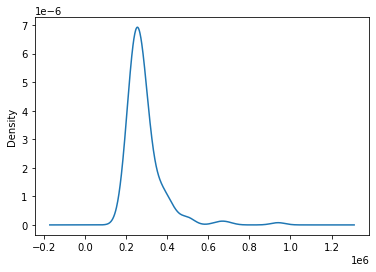

In [14]:
# fill the salary columns for null values
data['salary'].plot(kind='kde')

as we can see that our data is right skew so for the imputing the null values we have to select the meadian.

In [15]:
data['salary']=data['salary'].fillna(data['salary'].median())

In [16]:
# check the null values again
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [17]:
ssc_b = {'Others':1,
        "Central":2}    #both ssc and hsc can be done by this 
gender = {'M':1,'F':2}
hsc_stream = {'Science':1,'Commerce':2,'Arts':3}
degree = {'Comm&Mgmt':1,"Sci&Tech":2,"Others":3}
workexp = {'Yes':1,"No":2}
specialization = {'Mkt&Fin':1,'Mkt&HR':2}

In [18]:
data['ssc_b'].replace(ssc_b, inplace=True)
data['hsc_b'].replace(ssc_b, inplace=True)
data['gender'].replace(gender, inplace=True)
data['hsc_s'].replace(hsc_stream, inplace=True)
data['degree_t'].replace(degree, inplace=True)
data['workex'].replace(workexp, inplace=True)
data['specialisation'].replace(specialization, inplace=True)






In [19]:
# perform labeincoding
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data['status'] = lbl.fit_transform(data['status'])
"""0=not placeed and 1 mean place in status."""

'0=not placeed and 1 mean place in status.'

In [20]:
data.sample(5)

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
81        1   81.7      1   63.0      1      1      67.0         1       1   
87        1   59.6      2   51.0      2      1      60.0         3       2   
135       2   72.0      2   56.0      1      1      69.0         1       2   
77        1   64.0      1   80.0      1      1      65.0         2       1   
98        2   69.0      2   73.0      2      2      65.0         1       2   

     etest_p  specialisation  mba_p  status    salary  
81      86.0               1  70.20       1  300000.0  
87      75.0               2  59.08       0  265000.0  
135     55.6               2  65.63       1  200000.0  
77      69.0               1  57.65       1  500000.0  
98      70.0               1  57.31       1  220000.0

In [21]:
#spllit the feature and columns
features = data.drop(['status'], axis=1)
target = data['status']

In [22]:
features

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      2     58.00         2       2   
1         1  79.33      2  78.33      1      1     77.48         2       1   
2         1  65.00      2  68.00      2      3     64.00         1       2   
3         1  56.00      2  52.00      2      1     52.00         2       2   
4         1  85.80      2  73.60      2      2     73.30         1       2   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      2     77.60         1       2   
211       1  58.00      1  60.00      1      1     72.00         2       2   
212       1  67.00      1  67.00      1      2     73.00         1       1   
213       2  74.00      1  66.00      1      2     58.00         1       2   
214       1  62.00      2  58.00      1      1     53.00         1       2   

     etest_p  specialisation  mba_p    salary  
0       55.0               2  58.80  270000.0  
1       86.5               1  66.28  200000.0  
2       75.0               1  57.80  250000.0  
3       66.0               2  59.43  265000.0  
4       96.8               1  55.50  425000.0  
..       ...             ...    ...       ...  
210     91.0               1  74.49  400000.0  
211     74.0               1  53.62  275000.0  
212     59.0               1  69.72  295000.0  
213     70.0               2  60.23  204000.0  
214     89.0               2  60.22  265000.0  

[215 rows x 13 columns]

In [23]:
target

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

In [24]:
#train test split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.2,random_state=1)

In [25]:
#create the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = [LogisticRegression(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

In [26]:
from sklearn.metrics import accuracy_score
for mod in models:
    class_name = mod.__class__.__name__
    mod.fit(x_train,y_train)
    print(class_name+'training score: ',accuracy_score(y_train, mod.predict(x_train)))
    print(class_name+'testing score: ',accuracy_score(y_test, mod.predict(x_test)))


LogisticRegressiontraining score:  0.6976744186046512
LogisticRegressiontesting score:  0.6511627906976745
SVCtraining score:  0.6976744186046512
SVCtesting score:  0.6511627906976745
KNeighborsClassifiertraining score:  0.9825581395348837
KNeighborsClassifiertesting score:  0.9534883720930233
RandomForestClassifiertraining score:  1.0
RandomForestClassifiertesting score:  0.9767441860465116


In [27]:
# as we can see above cell output that KNN is perform well so we are going to select the KNN
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
from sklearn.metrics import confusion_matrix
print("Confusion metrix; ", confusion_matrix(y_test, model.predict(x_test)))

Confusion metrix;  [[14  1]
 [ 1 27]]


In [29]:
#save the model
import pickle
with open("knnClassifer.pkl", 'wb') as out:
    pickle.dump(model, out)